## Question 1:

Can I generate a model to determine if a property is in high crime area vs. low crime area? 

## Question 2:
What are the important variables?

1. Classification problem, important variables therefore use Log reg (knn doesn't have coefficients)
2. High / low crime rate not in dataset. Will need to be created.
3. ???
4. Profit.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import metrics, linear_model, neighbors, model_selection

In [4]:
#Read in data
df = pd.read_csv('../../assets/dataset/boston.csv')

In [17]:
#Check for missing observations
df.head()

,median_value,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,NaN,18.0,2.31,NaN,0.538,6.575,NaN,NaN,NaN,NaN,NaN,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,NaN,NaN,NaN,2.0,NaN,17.8,396.90,9.14
2,NaN,0.02729,0.0,NaN,0.0,NaN,NaN,61.1,4.9671,2.0,NaN,17.8,392.83,NaN
3,33.4,0.03237,0.0,2.18,0.0,NaN,NaN,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,NaN,0.06905,0.0,NaN,0.0,0.458,7.147,NaN,6.0622,3.0,222.0,NaN,396.90,NaN


In [14]:
#Calculate percentage of missing data

df.isnull().sum() / len(df) * 100

median_value    1.383399
CRIM            1.976285
ZN              1.185771
INDUS           1.383399
CHAS            1.185771
NOX             2.173913
RM              1.778656
AGE             1.976285
DIS             1.581028
RAD             1.383399
TAX             1.383399
PTRATIO         2.371542
B               0.988142
LSTAT           0.988142
dtype: float64

In [16]:
#Small amount of data, check if all obs with NAN dropped

df_drop = df.dropna(axis = 0, how = 'any')
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 25 to 505
Data columns (total 14 columns):
median_value    481 non-null float64
CRIM            481 non-null float64
ZN              481 non-null float64
INDUS           481 non-null float64
CHAS            481 non-null float64
NOX             481 non-null float64
RM              481 non-null float64
AGE             481 non-null float64
DIS             481 non-null float64
RAD             481 non-null float64
TAX             481 non-null float64
PTRATIO         481 non-null float64
B               481 non-null float64
LSTAT           481 non-null float64
dtypes: float64(14)
memory usage: 56.4 KB


In [19]:
df.describe()

,median_value,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,499.000000,496.000000,500.000000,499.000000,500.000000,495.000000,497.000000,496.000000,498.000000,499.000000,499.000000,494.000000,501.000000,501.000000
mean,22.507415,3.653725,11.475000,11.193988,0.070000,0.555452,6.286690,68.438911,3.786100,9.629259,409.923848,18.456883,356.357006,12.689242
std,9.208890,8.672508,23.434338,6.887049,0.255403,0.116975,0.704799,28.261360,2.120931,8.740619,169.073242,2.148480,91.693428,7.157608
min,5.000000,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.050000,0.081437,0.000000,5.160000,0.000000,0.448000,5.885000,44.225000,2.087225,4.000000,279.000000,17.400000,375.210000,7.010000
50%,21.200000,0.252775,0.000000,9.690000,0.000000,0.538000,6.209000,77.150000,3.122200,5.000000,334.000000,19.050000,391.450000,11.380000
75%,25.000000,3.694070,12.500000,18.100000,0.000000,0.627500,6.625000,94.025000,5.214600,24.000000,666.000000,20.200000,396.240000,17.090000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


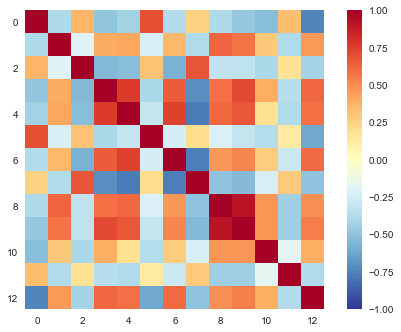

In [160]:
plt.imshow(df.drop(labels = ['CHAS'], axis = 1).corr(), 
           cmap = 'RdYlBu_r', 
           vmin = -1.0, 
           vmax = 1.0)

plt.grid('off')
plt.colorbar()
plt.show()

In [164]:
df.drop(labels = ['CHAS'], axis = 1).columns[8:10]

Index([u'RAD', u'TAX'], dtype='object')

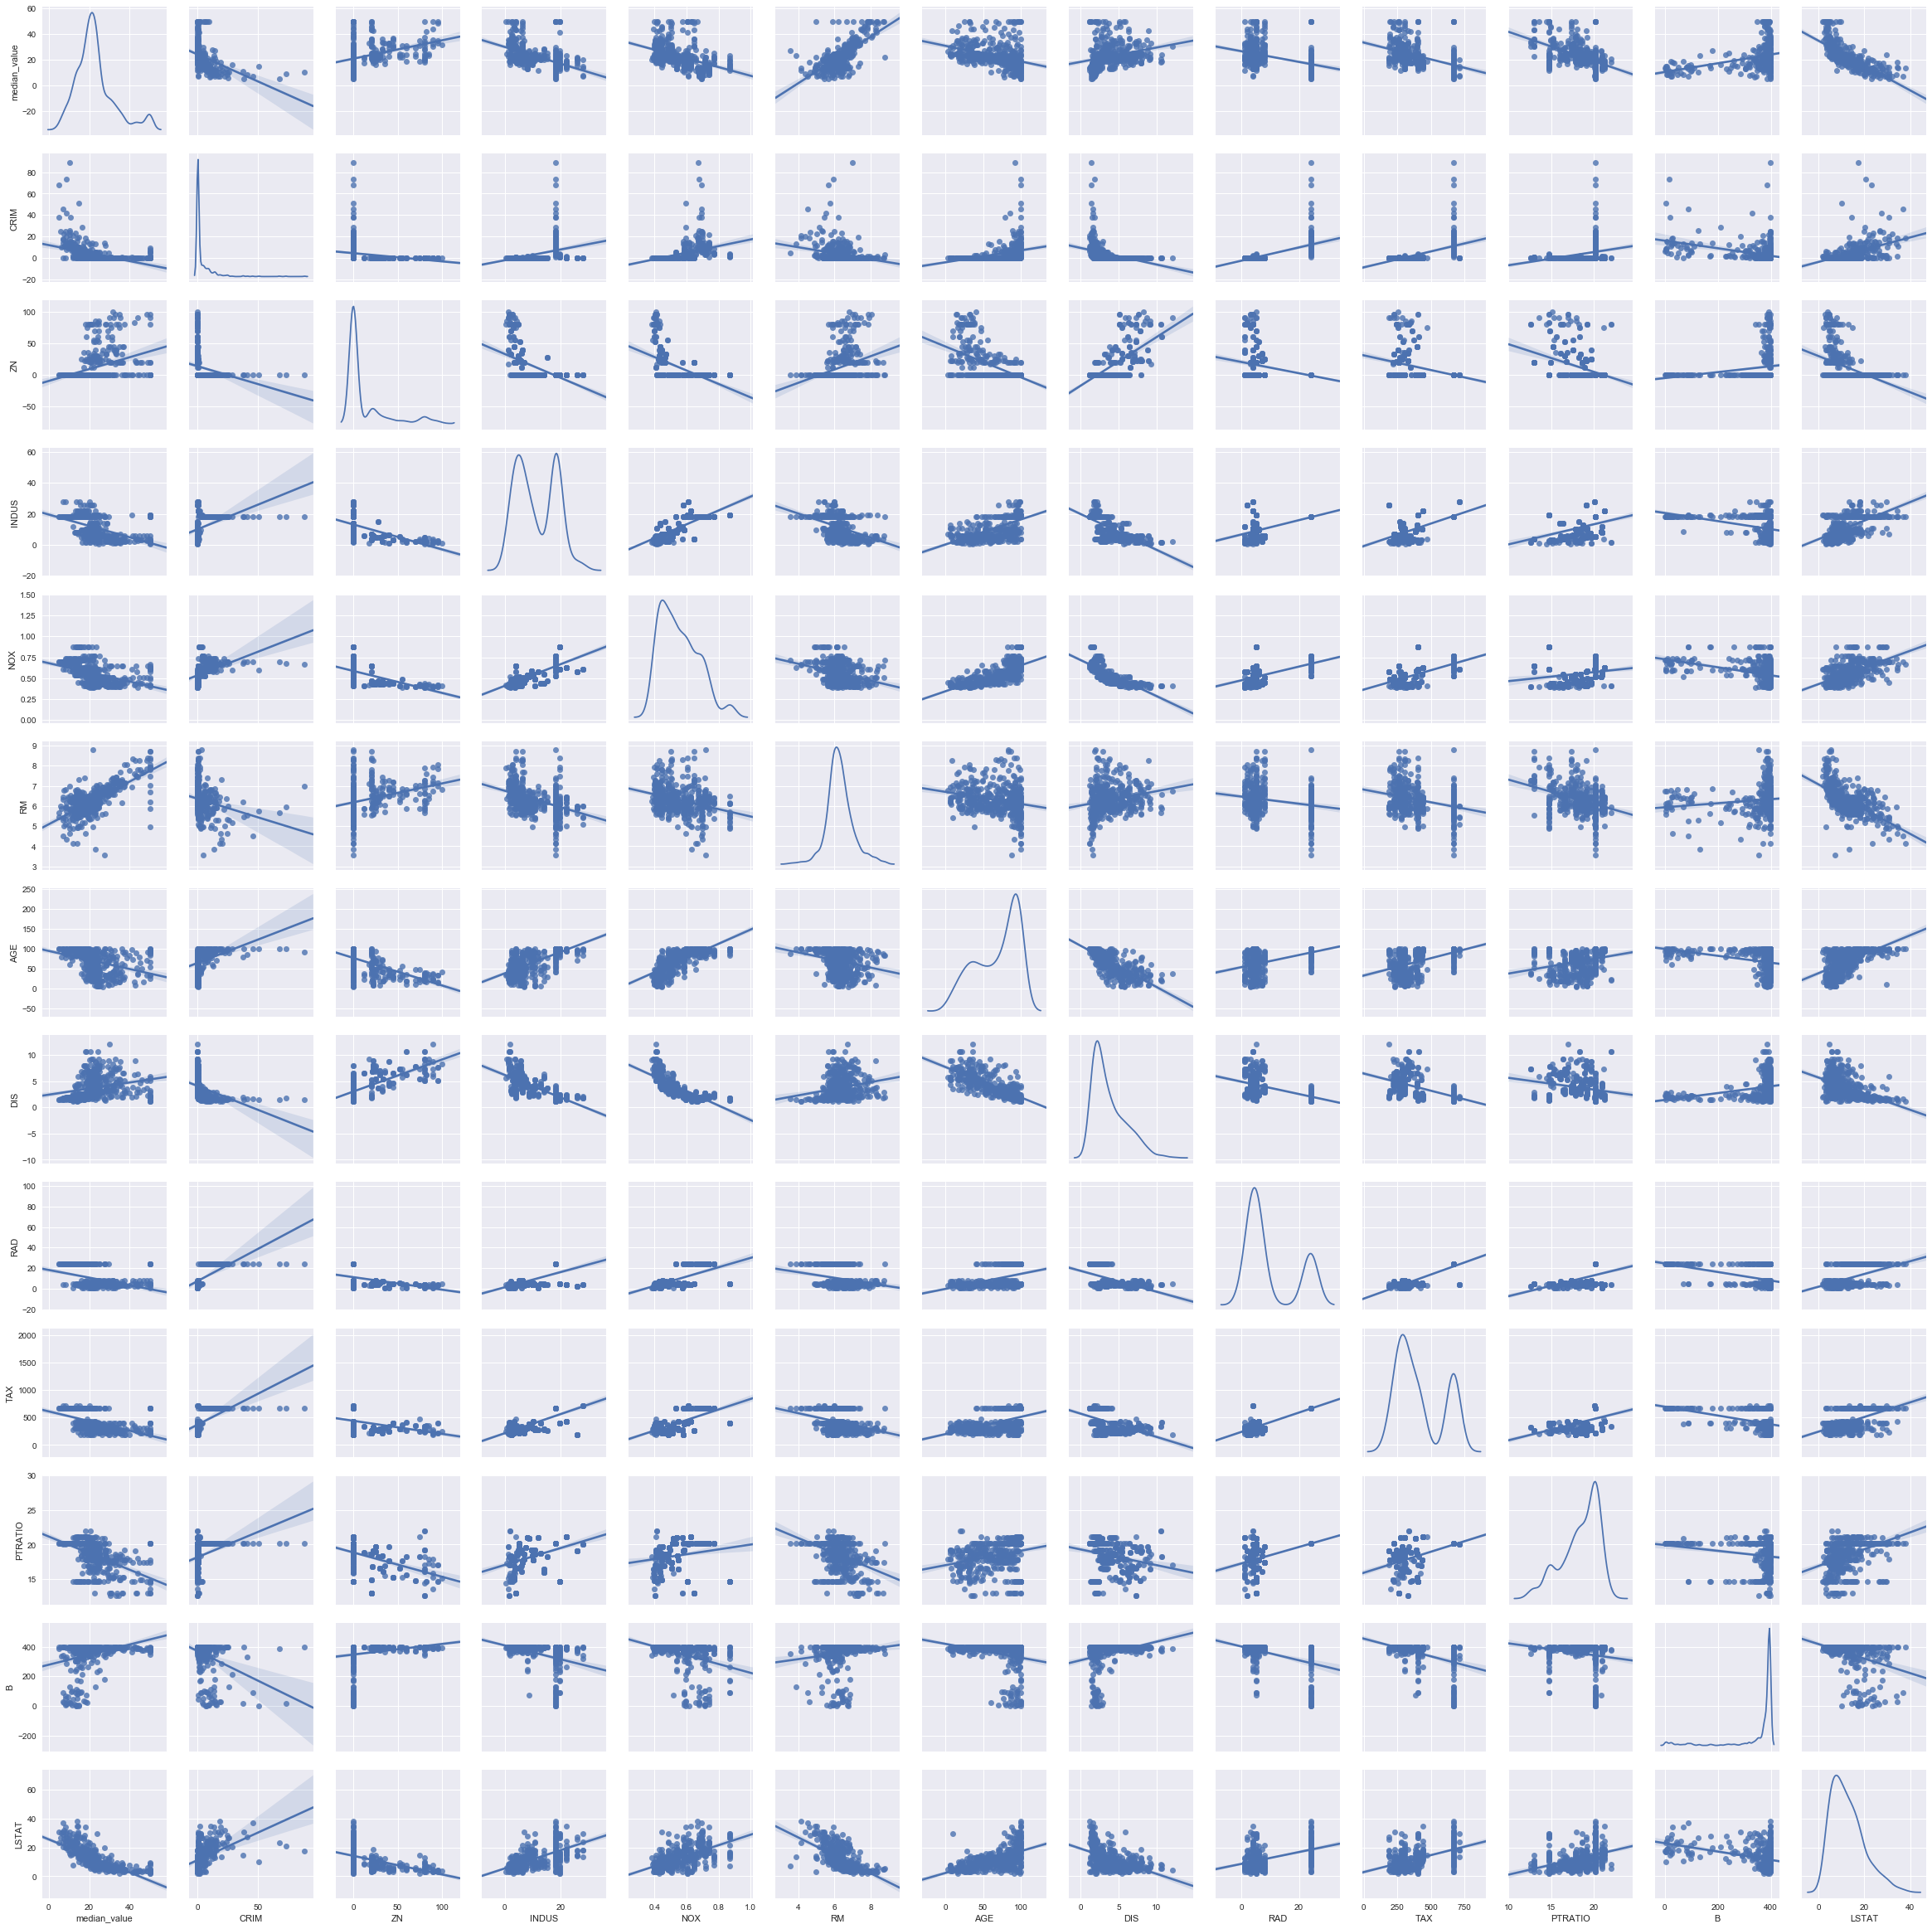

In [42]:
#FFS DON'T RUN THIS AGAIN!

sns.pairplot(df_drop.drop(labels = ['CHAS'], 
                          axis = 1),
                          diag_kind = 'kde', kind = 'reg')
plt.show()

In [46]:
df_drop.describe()

,median_value,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,22.590437,3.756473,11.734927,11.350208,0.072765,0.556552,6.292669,68.351767,3.732998,9.844075,414.264033,18.447193,355.047963,12.644116
std,9.325661,8.786809,23.821098,6.953941,0.260021,0.118377,0.712548,28.455928,2.131154,8.828848,170.574028,2.142827,93.233476,7.175234
min,5.000000,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.000000,0.081990,0.000000,5.130000,0.000000,0.448000,5.885000,43.400000,2.063500,4.000000,279.000000,17.400000,374.560000,6.930000
50%,21.200000,0.259150,0.000000,9.900000,0.000000,0.538000,6.216000,77.300000,3.033400,5.000000,348.000000,19.100000,391.270000,11.320000
75%,25.000000,3.849700,20.000000,18.100000,0.000000,0.631000,6.630000,94.100000,5.116700,24.000000,666.000000,20.200000,396.210000,16.940000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


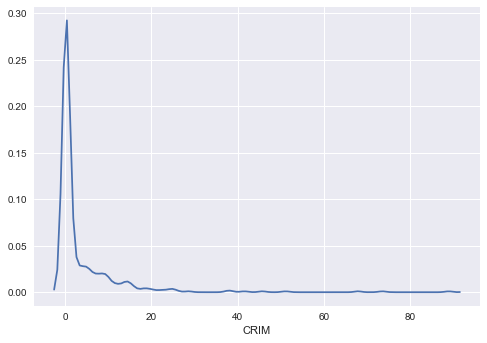

In [48]:
sns.distplot(df_drop['CRIM'], hist = False)
plt.show()

/home/ga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


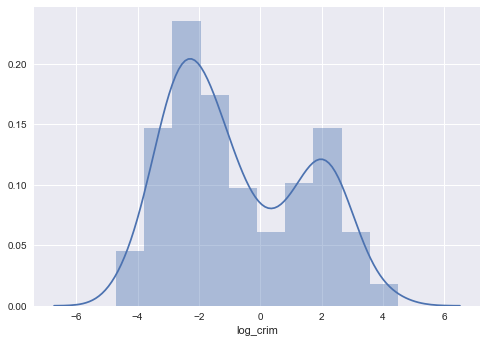

count    481.000000
mean      -0.748363
std        2.180642
min       -4.703886
25%       -2.501158
50%       -1.350348
75%        1.347995
max        4.488369
Name: log_crim, dtype: float64

In [56]:
df_drop['log_crim'] = np.log(df_drop['CRIM'])
sns.distplot(df_drop['log_crim'])
plt.show()
df_drop['log_crim'].describe()

## Crime rate is bimodal. Taking the mid point of the distro as "low" and "high"

In [165]:
#Make 1 as high crime rate

df_drop['crim_lo_hi'] = df_drop['log_crim'].apply(lambda x: 0 if x < 0 else 1)
print(df_drop['crim_lo_hi'].describe())
print(df_drop['crim_lo_hi'].sum())

count    481.000000
mean       0.353430
std        0.478533
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: crim_lo_hi, dtype: float64
170


/home/ga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
y = df_drop['crim_lo_hi'].values
X = df_drop.drop(labels = ['CRIM', 'log_crim', 'crim_lo_hi'], axis = 1).values
new_cols = df_drop.drop(labels = ['CRIM', 'log_crim', 'crim_lo_hi'], axis = 1).columns

In [167]:
new_cols

Index([u'median_value', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE',
       u'DIS', u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [168]:
#Run first basic log reg model
log_reg = linear_model.LogisticRegression().fit(X,y)
np.exp(log_reg.coef_)
zip(new_cols, np.exp(log_reg.coef_)[0])

[('median_value', 1.0403256472356479),
 ('ZN', 0.72815048351771638),
 ('INDUS', 1.1157585455364309),
 ('CHAS', 0.71253816187425834),
 ('NOX', 2.3496663108994675),
 ('RM', 0.538852881168432),
 ('AGE', 1.0928635880406175),
 ('DIS', 1.5229448400763639),
 ('RAD', 1.4593245508659709),
 ('TAX', 0.99978800149854419),
 ('PTRATIO', 0.63126528287432571),
 ('B', 0.9916548821349026),
 ('LSTAT', 1.0114955320046435)]

In [169]:
X_z = (X - np.mean(X)) / np.std(X)

In [170]:
skfolds = model_selection.StratifiedKFold(n_splits = 10, random_state = 1010)
params = {'penalty': ['l1', 'l2'], 
          'C': np.arange(0.1, 10.0, .01),
          'fit_intercept': [True, False]}

#Start tuning

gs = model_selection.GridSearchCV(estimator = linear_model.LogisticRegression(),
                                  param_grid = params,
                                  cv = skfolds,
                                  n_jobs = -1)
gs.fit(X_z,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1010, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1 ,  0.11, ...,  9.98,  9.99]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [171]:
gs.best_params_

{'C': 8.769999999999996, 'fit_intercept': False, 'penalty': 'l1'}

In [172]:
pen, c, fit_int = gs.best_params_.values()
print(pen, c, fit_int)

('l1', 8.769999999999996, False)


In [173]:
# Run Log Reg with best params

model = linear_model.LogisticRegressionCV(cv = skfolds, 
                                          penalty=pen, 
                                          fit_intercept=fit_int, 
                                          Cs=[c],
                                          solver = 'liblinear')
model.fit(X, y)

LogisticRegressionCV(Cs=[8.769999999999996], class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=1010, shuffle=False),
           dual=False, fit_intercept=False, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [183]:
model.scores_

{1: array([[ 0.83673469],
        [ 0.83333333],
        [ 0.97916667],
        [ 0.97916667],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 0.89583333]])}

In [175]:
zip(new_cols, np.exp(model.coef_)[0])

[('median_value', 1.1090173568280841),
 ('ZN', 0.67169592377642229),
 ('INDUS', 1.0627566832205961),
 ('CHAS', 0.60778921737793201),
 ('NOX', 319627.32157273282),
 ('RM', 0.17397646385815985),
 ('AGE', 1.0806538698661765),
 ('DIS', 1.9368985420221565),
 ('RAD', 1.4428507970132443),
 ('TAX', 0.99888993476712973),
 ('PTRATIO', 0.70362910075230989),
 ('B', 0.98955944697935871),
 ('LSTAT', 0.95866258143919381)]

In [176]:
new_cols.shape

(13,)